# CS224 - Spring 2024 - HW1 - Joy-o-Meter

Submit **PDF** of completed IPython notebook on Canvas

**Due**: February 1, 2024 @ 11:59pm PDT

**Maximum points**: 15 (each HW is %15 of total grade)

<div style="margin-bottom: 15px; padding: 15px; color: #31708f; background-color: #d9edf7; border: 1px solid #bce8f1; border-radius: 5px;">
    
<b><font size=+2>Enter your information below:</font></b></br></br>

  <b>(full) Name</b>: Lohith Kumar Bhambore
  </br>
  <b>Student ID Number</b>:  862393065
  </br></br>
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>

# Overview
In this assignment you will implement a simple linear neural network that reads in text and uses pretrained embeddings to predict the **happiness intensity** of the text.
You'll fit the network weights using the analytic expression we discussed in class.

For this assignment we will use the functionality of PyTorch, HuggingFace "transformers" library for getting pretrained models, "pandas" for data loading, matplotlib for visualization. Before you start, make sure you have installed all those packages in your local Jupyter instance. Or use Google Colab (which has everything you need pre-installed).

Read **all** cells carefully and answer **all** parts (both text and missing code). You will complete all the code marked `TODO` and print desired results.

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## **Getting and processing data [2 points]**
You can download the two data files here:
https://elearn.ucr.edu/files/11510987/download?download_frd=1
https://elearn.ucr.edu/files/11510996/download?download_frd=1
You'll have to make them available locally or upload them to your colab instance.

In [ ]:
# Load dataset and visualize

# Referenced GeeksForGeeks article for mounting google drive (https://www.geeksforgeeks.org/how-to-load-a-dataset-from-the-google-drive-to-google-colab/)
from google.colab import drive
drive.mount('/content/drive')

train_file = '/content/drive/MyDrive/CS224-FunadamentalsOfMachineLearning/HW1-Joy-O-Meter/EI-reg-En-joy-train.txt'
val_file = '/content/drive/MyDrive/CS224-FunadamentalsOfMachineLearning/HW1-Joy-O-Meter/2018-EI-reg-En-joy-dev.txt'

df_train = pd.read_csv(train_file, sep='\t')
df_val = pd.read_csv(val_file, sep='\t')

tweets_train = df_train['Tweet'].tolist()  # Create a list of tweets
tweets_val = df_val['Tweet'].tolist()

# Create a list of intensity scores
y_train = torch.tensor(df_train['Intensity Score'], dtype=torch.float32)  # match to dtype of embedding
y_val = torch.tensor(df_val['Intensity Score'], dtype=torch.float32)

print('Score - Tweet')
for i in range(5):
    print('{:0.2f} - {}'.format(y_train[i], tweets_train[i]))

Mounted at /content/drive
Score - Tweet
0.14 - @david_garrett Quite saddened.....no US dates, no joyous anticipation of attending a DG concert (since 2014). Happy you are keeping busy.
0.79 - 2 days until #GoPackGo and 23 days until #GoGipeGo..... I'm so excited! 
0.27 - Positive #psychology research shows salespeople who score in the top 10% for #optimism have 88% &gt; sales than those in top 10% for pessimism.
0.48 - As the birds chirp and the cows moo we need to listen to the sound of nature to ensure that all is well.
0.94 - Howling with laughter at “WELL DONE BEZZA!” #bakeoff #GBBO


In [ ]:
# TODO [1 point]: load a pretrained model and write a function that embeds sentences into vector space
# Use the approach shown in Jan. 19 class (or improve on it)
# Referenced the zoom video recording of class

model_name="bert-base-uncased"  # Many possibilities on huggingface.com

# Load pre-trained model tokenizer (vocabulary)
bert_tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the pre-trained model
bert_model = AutoModel.from_pretrained(model_name)

def embed_sentence(model, tokenizer, sentence):
    """Function to embed a sentence as a vector using a pre-trained model."""
    inputs = bert_tokenizer(sentence, return_tensors="pt") # pt stands for pytorch... and to turn text into one hot vectors

    # Forward pass, get hidden states
    with torch.no_grad():
      outputs = model(**inputs) # Different notation to send only input id's to the model

    # For BERT, last hidden state is the embedding of each item in the sequence
    # Using mean embedding which is a very good choice for BERT (though not for GPT)
    return outputs.last_hidden_state[0].mean(dim=0)
    # return outputs.last_hidden_state[0, 0]  # We could also use CLS token, which also a good choice

# Just a small test
myTestSentence = "This was the funniest thing I had ever seen!!!"
print(embed_sentence(bert_model, bert_tokenizer, myTestSentence).shape)
# print(embed_sentence(bert_model, bert_tokenizer, myTestSentence))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

torch.Size([768])


In [ ]:
# TODO [1 point]: Use embed_sentence to turn text into a matrix of embeddings.
# Create a pytorch matrix where each row corresponds to a tweet,
# and the number of columns/features is the size of the embedding
# (Obviously one for train and one for validation)
# For me, on the CPU of my laptop, it took about a minute or two to do the processing

# X_train = torch.randn((len(y_train), 768))  # Delete and replace placeholder
# X_val = torch.randn((len(y_val), 768))  # Delete and replace placeholder

#Shapes of X_train and X_val should be - torch.Size([1616, 768]) torch.Size([290, 768])
def createMatrix (modelName, tokenizer):
  X_train = []
  X_val = []

  # Tweets to matrix
  for tweet in tweets_train:
    # Call embed_sentence
    current_embedding = embed_sentence(modelName, tokenizer, tweet)
    # Add to a list
    X_train.append(current_embedding)
  # Convert list to a tensor (matrix)
  X_train = torch.stack(X_train, dim=0)
  #print(X_train.shape)

  for tweet in tweets_val:
    # Call embed_sentence
    current_embedding = embed_sentence(modelName, tokenizer, tweet)
    # Add to a list
    X_val.append(current_embedding)
  # Convert list to a tensor (matrix)
  X_val = torch.stack(X_val, dim=0)

  print(X_train.shape, X_val.shape)
  return X_train, X_val

X_train, X_val = createMatrix(bert_model, bert_tokenizer)

torch.Size([1616, 768]) torch.Size([290, 768])


## Define the model [5 points]

In [ ]:
class MyLinearNet(torch.nn.Module):
    def __init__(self, embedding_size):
        super().__init__()  # init superclass - enables many pytorch model capabilities
        self.d = embedding_size  # Often convenient to store this (not a "Parameter" though as we don't train it)
        # TODO [1 point]: define weights and bias parameters
        self.b = torch.nn.Parameter(torch.tensor(1.))
        self.w = torch.nn.Parameter(torch.randn(self.d))

    def forward(self, x):
        """Implement a linear model"""
        # TODO [1 point]: implement linear model, in terms of weights and biases
        # It should work on a single x, or a batch
        # last dimension of row vector = row, last dimension of matrix = col, so use dim = -1 for sum
        y_hat = (self.w*x).sum(dim = -1) + self.b
        return y_hat

    def fit(self, X, y):
        """Given a data matrix, X, and a vector of labels for each row, y,
        analytically fit the parameters of the linear model."""
        # TODO [3 points]: Use linear regression formula to set weight and bias parameters

        # (a) First, construct the augmented data matrix as discussed in class
        # Add 1s which is the same number as the number of sentences
        # y = XW + 1.B
        # y = [X 1]*[W B] = [x1,x2]*[w1,w2] + b= w1*x1 + w2*x2 + b =[x1,x2,1]*[w1,w2,b]
        X = torch.cat([X, torch.ones(len(X), 1)], dim = 1)

        # (b) Next, use matrix multiplication and torch.linalg.inv to implement the analytic solution
        # w = (XtX)InvXty
        w = (torch.linalg.pinv(X.T @ X) @ X.T) @ y

        # (c) Put the solution (which includes weights and biases) into parameter
        # Use "data" to update parameters without affecting computation graph
        # (Kind of a subtle point - no need to modify my code below)
        self.w.data = w[:self.d]  # setting the first d elements of the modified w to w
        self.b.data = w[-1]       # setting the last element of the modified w to b

## Results [8 points]

In [ ]:
def loss(model, X, y):
    # TODO [1 point]: implement the mean squared error loss
    y_hat = model(X)
    return ((y_hat - y)**2).mean()

d = X_train.shape[1]  # embedding dimension
model = MyLinearNet(d)

loss_train = loss(model, X_train, y_train)
loss_val = loss(model, X_val, y_val)
print("\nLoss on train and validation BEFORE fitting.\nTrain: {:0.3f}, Val: {:0.3f}".format(loss_train, loss_val))

model.fit(X_train, y_train)

loss_train = loss(model, X_train, y_train)
loss_val = loss(model, X_val, y_val)

# TODO [5 points]: Show that Train loss is reduced below 0.02
# and Validation loss is reduced below 0.05, at least

print("\nLoss on train and validation AFTER fitting.\nTrain: {:0.3f}, Val: {:0.3f}".format(loss_train, loss_val))



Loss on train and validation BEFORE fitting.
Train: 137.801, Val: 153.311

Loss on train and validation AFTER fitting.
Train: 0.014, Val: 0.025


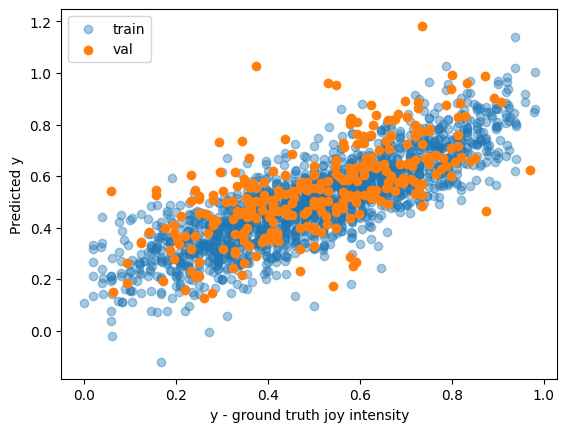

In [ ]:
# Create a scatter plot of the actual vs. predicted values of `y` using this function.
def plot(y_train, y_hat_train, y_val, y_hat_val):
    fig, ax = plt.subplots(1)
    ax.scatter(y_train, y_hat_train, alpha=0.4, label='train')
    ax.scatter(y_val, y_hat_val, label='val')
    ax.set_xlabel('y - ground truth joy intensity')
    ax.set_ylabel('Predicted y')
    ax.legend()


# TODO [1 point] show y_hat versus y on train and val data
# Should be no need to modify code, you get 1 point for getting
# something that looks correct.
with torch.no_grad():  # remember to turn off auto gradient tracking
    y_hat_train = model(X_train)
    y_hat_val = model(X_val)

plot(y_train, y_hat_train, y_val, y_hat_val)

In [ ]:
# TODO [1 point]  Put in a sample sentence of your own construction and output the "joy meter" for a happy and sad sentence
happy = "I am never happier than when I'm doing homework :) LOL"
sad = "I am so tired of homework right now"

happy_embedding = embed_sentence(bert_model, bert_tokenizer, happy)
sad_embedding = embed_sentence(bert_model, bert_tokenizer, sad)

y_hat_happy = model(happy_embedding)
y_hat_sad = model(sad_embedding)

print('{:0.2f} - {}'.format(y_hat_happy, happy))
print('{:0.2f} - {}'.format(y_hat_sad, sad))

0.66 - I am never happier than when I'm doing homework :) LOL
0.13 - I am so tired of homework right now


## Extra credit

There are some nice opportunities for extra credit, though I will be fairly stingy with the points, so you should only try it if you're interested in learning more.
Some examples of things you could try for 1 extra point.
- Compare multiple embedding methods. For instance, I'd look at a contrastive method like
princeton-nlp/unsup-simcse-bert-base-uncased or sentence-transformers/all-mpnet-base-v2 and a CLIP variant (trained on text and images). I hypothesize the contrastive methods will be better than CLIP for this task (which is not a visual task). You could also try a GPT model embedding, but while they are great at generation the embeddings are typically not useful for other tasks.
- Work ahead and try putting in a multi-layer MLP and training with SGD. How much can you improve the validation loss?
- Compare different strategies for extracting BERT embeddings: instead of using the mean embedding like I showed in class, compare to the embedding from the first token (to make this work better, people sometimes prepend the sentence with a special [cls] token before tokenizing).

## Extra credit 1 - Contrastive vs CLIP vs BERT

In [ ]:
# Extra Credit
# Using Contrastive embedding method - princeton-nlp/unsup-simcse-bert-base-uncased

contrastive_model_name = "princeton-nlp/unsup-simcse-bert-base-uncased"

# Load pre-trained model tokenizer (vocabulary)
contrastive_tokenizer = AutoTokenizer.from_pretrained(contrastive_model_name)

# Load the pre-trained model
contrastive_model = AutoModel.from_pretrained(contrastive_model_name)

# Just a small test
myTestSentence = "This was the funniest thing I had ever seen!!!"
print(embed_sentence(contrastive_model, contrastive_tokenizer, myTestSentence).shape)
# print(embed_sentence(contrastive_model, contrastive_tokenizer, myTestSentence))

X_train, X_val = createMatrix(contrastive_model, contrastive_tokenizer)

d = X_train.shape[1]  # embedding dimension
model = MyLinearNet(d)

loss_train = loss(model, X_train, y_train)
loss_val = loss(model, X_val, y_val)
print("\nLoss on train and validation BEFORE fitting.\nTrain: {:0.3f}, Val: {:0.3f}".format(loss_train, loss_val))

model.fit(X_train, y_train)

loss_train = loss(model, X_train, y_train)
loss_val = loss(model, X_val, y_val)

# TODO [5 points]: Show that Train loss is reduced below 0.02
# and Validation loss is reduced below 0.05, at least

print("\nLoss on train and validation AFTER fitting.\nTrain: {:0.3f}, Val: {:0.3f}".format(loss_train, loss_val))

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/697 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

torch.Size([768])
torch.Size([1616, 768]) torch.Size([290, 768])

Loss on train and validation BEFORE fitting.
Train: 178.837, Val: 205.490

Loss on train and validation AFTER fitting.
Train: 0.013, Val: 0.025


In [ ]:
! pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-_svpw7uk
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-_svpw7uk
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
# Extra Credit
# Using Contrastive embedding method - princeton-nlp/unsup-simcse-bert-base-uncased
# Referenced https://github.com/openai/CLIP

import clip

clip_model_name = "ViT-B/32"

# sentences is a list of sentences
def get_clip_embedding (sentences):

  model, preprocess = clip.load(clip_model_name)
  # tokens = clip.tokenize(["a diagram", "a dog", "a cat"])
  tokens = clip.tokenize(sentences)
  with torch.no_grad():
      text_embedding = model.encode_text(tokens)
  return text_embedding

# A test case
text_embedding = get_clip_embedding("This was the funniest thing I had ever seen!!!")
print(text_embedding.shape)
# print(text_embedding)

100%|███████████████████████████████████████| 338M/338M [01:03<00:00, 5.53MiB/s]


torch.Size([1, 512])


In [ ]:
#Shapes of X_train and X_val should be - torch.Size([1616, 512]) torch.Size([290, 512])
def createMatrixForClip():
  X_train = []
  X_val = []
  X_train = get_clip_embedding(tweets_train)
  X_val = get_clip_embedding(tweets_val)
  return X_train, X_val

X_train, X_val = createMatrixForClip()
print(X_train.shape, X_val.shape)

torch.Size([1616, 512]) torch.Size([290, 512])


In [ ]:
d = X_train.shape[1]  # embedding dimension
model = MyLinearNet(d)

loss_train = loss(model, X_train, y_train)
loss_val = loss(model, X_val, y_val)
print("\nLoss on train and validation BEFORE fitting.\nTrain: {:0.3f}, Val: {:0.3f}".format(loss_train, loss_val))


Loss on train and validation BEFORE fitting.
Train: 133.835, Val: 156.801


In [ ]:
model.fit(X_train, y_train)

loss_train = loss(model, X_train, y_train)
loss_val = loss(model, X_val, y_val)

# TODO [5 points]: Show that Train loss is reduced below 0.02
# and Validation loss is reduced below 0.05, at least

print("\nLoss on train and validation AFTER fitting.\nTrain: {:0.3f}, Val: {:0.3f}".format(loss_train, loss_val))


Loss on train and validation AFTER fitting.
Train: 0.011, Val: 0.029


BERT vs Contrastive model vs CLIP Embedding

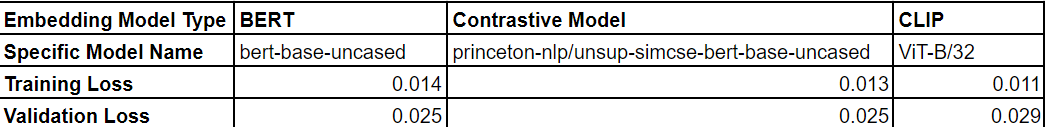

## Extra credit 2 - MLP and SGD

In [ ]:
# Multi-layer Perceptron and SGD optimizer
# Referenced this github page - https://github.com/christianversloot/machine-learning-articles/blob/main/creating-a-multilayer-perceptron-with-pytorch-and-lightning.md

# some imports
from torch.utils.data import DataLoader # To feed data to MLP during training
from torchvision import transforms  # To perform transformations on data before feeding it to MLP

In [ ]:
# Define a MLP neural network class with 3 layers

class MultiLayerPerceptron (torch.nn.Module):
    def __init__(self, embedding_size):
      super().__init__()
      self.d = embedding_size
      self.layers = torch.nn.Sequential(
          torch.nn.Linear(self.d, 2048),
          torch.nn.ReLU(),
          torch.nn.Dropout(),
          torch.nn.Linear(2048, 2048),
          torch.nn.ReLU(),
          torch.nn.Dropout(),
          torch.nn.Linear(2048, 2048),
          torch.nn.ReLU(),
          torch.nn.Dropout(),
          torch.nn.Linear(2048, 1)
      )

    def forward(self, x):
      return self.layers(x)

In [ ]:
# Training

# Set fixed random number seed
torch.manual_seed(42)

# Using mean Bert embeddings to create data set
# X_train, X_val = createMatrix(bert_model, bert_tokenizer)

d = X_train.shape[1]  # embedding dimension

dataset = torch.utils.data.TensorDataset(X_train, y_train)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)


In [ ]:
# Training

model = MultiLayerPerceptron(d)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Set max number of epochs to run
num_epochs = 100

# Run the training loop
for epoch in range(0, num_epochs): # 5 epochs at maximum

    # Print the current epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

      # Fix this part
      # Get inputs
      inputs, true_outputs = data

      # Zero the gradients to start anew for each batch
      optimizer.zero_grad()

      pred_outputs = model(inputs)

      # Calculate the loss using loss functioned defined earlier, which is Mean Squared Error loss.
      # The loss function has the forward pass in it

      # loss (model, X, y)
      #trainingLoss = loss(model, inputs, true_outputs)

      # Use pytorch MSELoss
      trainingLoss = torch.nn.MSELoss()

      loss = trainingLoss(pred_outputs, true_outputs)
      # Perform backward pass and compute the gradients
      loss.backward()

      # Use SGD optimizer to optimize the weights
      optimizer.step()

      # Print the progress once at the 50th minibatch
      current_loss += loss.item()
      # if i % 50 == 49:
      #     print('Loss after mini-batch %5d: %.3f' %
      #           (i + 1, current_loss / 50))
      #     current_loss = 0.0
    current_loss = current_loss / (i + 1)
    print('Loss in this epoch is %.3f' %current_loss)
# End of training
print('Training process has finished.')

Starting epoch 1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Loss in this epoch is 0.056
Starting epoch 2


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Loss in this epoch is 0.047
Starting epoch 3
Loss in this epoch is 0.046
Starting epoch 4
Loss in this epoch is 0.047
Starting epoch 5
Loss in this epoch is 0.046
Starting epoch 6
Loss in this epoch is 0.046
Starting epoch 7
Loss in this epoch is 0.046
Starting epoch 8
Loss in this epoch is 0.046
Starting epoch 9
Loss in this epoch is 0.046
Starting epoch 10
Loss in this epoch is 0.046
Starting epoch 11
Loss in this epoch is 0.046
Starting epoch 12
Loss in this epoch is 0.046
Starting epoch 13
Loss in this epoch is 0.046
Starting epoch 14
Loss in this epoch is 0.046
Starting epoch 15
Loss in this epoch is 0.046
Starting epoch 16


KeyboardInterrupt: 

In [ ]:
# Find the validation loss
y_val_pred = model(X_val)
loss_val = trainingLoss(y_val_pred, y_val).item()
#print(type(loss_val))
print("{:0.3f}".format(loss_val))

0.037


## Extra credit 3 - Different Strategies for extracting BERT embeddings

In [ ]:
# A new function which uses CLS token instead of mean

def embed_sentence_cls(model, tokenizer, sentence, extraCLS = 'false'):
    """Function to embed a sentence as a vector using a pre-trained model."""

    if(extraCLS) :
      sentence += "[CLS]"

    inputs = bert_tokenizer(sentence, return_tensors="pt") # pt stands for pytorch... and to turn text into one hot vectors

    # Forward pass, get hidden states
    with torch.no_grad():
      outputs = model(**inputs) # Different notation to send only input id's to the model

    # For BERT, last hidden state is the embedding of each item in the sequence
    # Using mean embedding which is a very good choice for BERT (though not for GPT)
    return outputs.last_hidden_state[0, 0]  # Using CLS token instead of mean

# Just a small test
myTestSentence = "This was the funniest thing I had ever seen!!!"
print(embed_sentence_cls(bert_model, bert_tokenizer, myTestSentence).shape)
# print(embed_sentence_cls(bert_model, bert_tokenizer, myTestSentence))

torch.Size([768])


In [ ]:
def createMatrixCLS (modelName, tokenizer, extraCLS = 'false'):
  X_train = []
  X_val = []

  # Tweets to matrix
  for tweet in tweets_train:
    # Call embed_sentence
    current_embedding = embed_sentence_cls(modelName, tokenizer, tweet, extraCLS)
    # Add to a list
    X_train.append(current_embedding)
  # Convert list to a tensor (matrix)
  X_train = torch.stack(X_train, dim=0)
  #print(X_train.shape)

  for tweet in tweets_val:
    # Call embed_sentence
    current_embedding = embed_sentence_cls(modelName, tokenizer, tweet, extraCLS)
    # Add to a list
    X_val.append(current_embedding)
  # Convert list to a tensor (matrix)
  X_val = torch.stack(X_val, dim=0)

  print(X_train.shape, X_val.shape)
  return X_train, X_val

In [ ]:
# Adding an extra CLS token at the start of each sentence before tokenization and taking the first embedding instead of mean
extraCLS = True
X_train, X_val = createMatrixCLS(bert_model, bert_tokenizer, extraCLS)

d = X_train.shape[1]  # embedding dimension
model = MyLinearNet(d)

loss_train = loss(model, X_train, y_train)
loss_val = loss(model, X_val, y_val)
print("\nLoss on train and validation BEFORE fitting.\nTrain: {:0.3f}, Val: {:0.3f}".format(loss_train, loss_val))

model.fit(X_train, y_train)

loss_train = loss(model, X_train, y_train)
loss_val = loss(model, X_val, y_val)

# TODO [5 points]: Show that Train loss is reduced below 0.02
# and Validation loss is reduced below 0.05, at least

print("\nLoss on train and validation AFTER fitting.\nTrain: {:0.3f}, Val: {:0.3f}".format(loss_train, loss_val))


In [ ]:
# Without adding an extra CLS token at the start of each sentence before tokenization, but taking the first embedding instead of mean

extraCLS = False
X_train, X_val = createMatrixCLS (bert_model, bert_tokenizer, extraCLS)

d = X_train.shape[1]  # embedding dimension
model = MyLinearNet(d)

loss_train = loss(model, X_train, y_train)
loss_val = loss(model, X_val, y_val)
print("\nLoss on train and validation BEFORE fitting.\nTrain: {:0.3f}, Val: {:0.3f}".format(loss_train, loss_val))

model.fit(X_train, y_train)

loss_train = loss(model, X_train, y_train)
loss_val = loss(model, X_val, y_val)

# TODO [5 points]: Show that Train loss is reduced below 0.02
# and Validation loss is reduced below 0.05, at least

print("\nLoss on train and validation AFTER fitting.\nTrain: {:0.3f}, Val: {:0.3f}".format(loss_train, loss_val))

CLS vs Mean

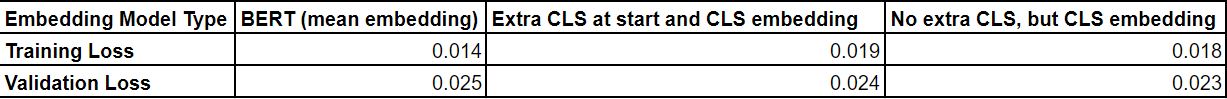

